In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

In [2]:
grades = pd.read_csv("./data/food+establishment+grades.csv")

# Getting a general sense of the food establishment grades data

In [3]:
grades.head()

,LICENSENO,ISSDTTM,EXPDTTM,LICSTATUS,LICENSECAT,DESCRIPT,RESULT,RESULTDTTM,SUM_VIOLATIONS,SCORE,GRADE
0,77958,3/14/2012 9:17,12/31/2012 23:59,Inactive,FT,Eating & Drinking w/ Take Out,HE_Pass,1/3/2012 7:26,0,100,A
1,74470,2/1/2012 12:29,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Filed,1/3/2012 9:42,6,94,A
2,18086,12/27/2011 12:46,12/31/2011 23:59,Inactive,RF,Retail Food,HE_Fail,1/3/2012 10:06,6,94,A
3,77035,1/26/2012 11:01,12/31/2018 23:59,Active,RF,Retail Food,HE_FailExt,1/3/2012 10:07,12,88,B
4,20285,2/24/2012 14:46,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Filed,1/3/2012 10:32,2,98,A


In [4]:
grades.rename(str.lower, axis = "columns", inplace = True)

In [5]:
grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72243 entries, 0 to 72242
Data columns (total 11 columns):
licenseno         72243 non-null int64
issdttm           72243 non-null object
expdttm           72243 non-null object
licstatus         72243 non-null object
licensecat        72243 non-null object
descript          72243 non-null object
result            72243 non-null object
resultdttm        72243 non-null object
sum_violations    72243 non-null int64
score             72243 non-null int64
grade             72243 non-null object
dtypes: int64(3), object(8)
memory usage: 6.1+ MB


In [6]:
grades.describe()

,licenseno,sum_violations,score
count,72243.000000,72243.000000,72243.000000
mean,58498.182108,8.642346,91.357654
std,59463.612719,15.921356,15.921356
min,54.000000,0.000000,-147.000000
25%,22112.000000,0.000000,88.000000
50%,28452.000000,0.000000,100.000000
75%,78079.000000,12.000000,100.000000
max,367152.000000,247.000000,100.000000


In [7]:
#how many unique restaurants are in the dataset?
grades['licenseno'].nunique()

7558

In [8]:
#how many of those are active?
grades[grades["licstatus"] == "Active"].nunique()

licenseno          4054
issdttm            3911
expdttm               3
licstatus             1
licensecat            4
descript              4
result                8
resultdttm        48954
sum_violations      156
score               156
grade                 3
dtype: int64

In [9]:
#how many grades does one restaurant usually have?

In [10]:
print(grades['licenseno'].value_counts().median())
print(grades['licenseno'].value_counts().mean())

8.0
9.5584810796507


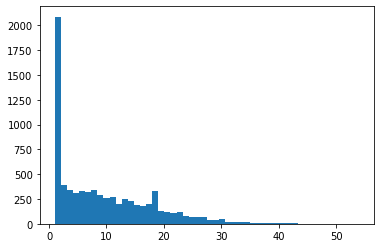

In [11]:
plt.hist(grades["licenseno"].value_counts(), bins = 50);

In [12]:
#distribution of inspection results?

In [13]:
grades["result"].value_counts()

HE_Pass       28828
HE_Fail       21409
HE_Filed       9513
HE_NotReq      7262
HE_FailExt     3047
HE_Hearing     1414
HE_TSOP         450
HE_OutBus       320
Name: result, dtype: int64

In [14]:
#type of restaurant

In [15]:
grades["descript"].value_counts()

Eating & Drinking                30780
Eating & Drinking w/ Take Out    26971
Retail Food                      13091
Mobile Food Walk On               1401
Name: descript, dtype: int64

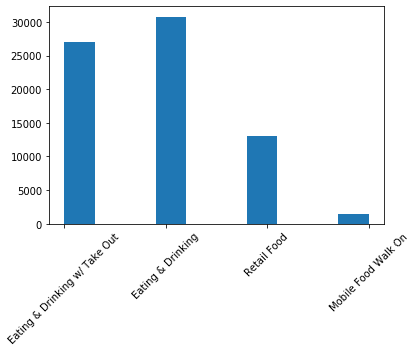

In [16]:
plt.hist(grades["descript"])
plt.xticks(rotation=45);

In [17]:
#explore sum violations

In [18]:
grades['sum_violations'].describe()

count    72243.000000
mean         8.642346
std         15.921356
min          0.000000
25%          0.000000
50%          0.000000
75%         12.000000
max        247.000000
Name: sum_violations, dtype: float64

In [19]:
#is the 247 a mistake? Doesn't seem like that could be right?
grades[grades['sum_violations']== 247] 

,licenseno,issdttm,expdttm,licstatus,licensecat,descript,result,resultdttm,sum_violations,score,grade
30267,22075,12/20/2011 14:02,12/31/2017 23:59,Inactive,FS,Eating & Drinking,HE_TSOP,5/30/2014 11:07,247,-147,C


In [20]:
grades[grades["licenseno"] == 22075]

,licenseno,issdttm,expdttm,licstatus,licensecat,descript,result,resultdttm,sum_violations,score,grade
1045,22075,12/20/2011 14:02,12/31/2017 23:59,Inactive,FS,Eating & Drinking,HE_Fail,2/7/2012 12:15,6,94,A
1535,22075,12/20/2011 14:02,12/31/2017 23:59,Inactive,FS,Eating & Drinking,HE_Pass,2/24/2012 14:17,0,100,A
8534,22075,12/20/2011 14:02,12/31/2017 23:59,Inactive,FS,Eating & Drinking,HE_Filed,10/24/2012 12:26,14,86,B
11486,22075,12/20/2011 14:02,12/31/2017 23:59,Inactive,FS,Eating & Drinking,HE_NotReq,12/30/2012 0:00,0,100,A
18964,22075,12/20/2011 14:02,12/31/2017 23:59,Inactive,FS,Eating & Drinking,HE_Filed,5/31/2013 14:51,4,96,A
24459,22075,12/20/2011 14:02,12/31/2017 23:59,Inactive,FS,Eating & Drinking,HE_NotReq,12/30/2013 0:00,0,100,A
30267,22075,12/20/2011 14:02,12/31/2017 23:59,Inactive,FS,Eating & Drinking,HE_TSOP,5/30/2014 11:07,247,-147,C
30320,22075,12/20/2011 14:02,12/31/2017 23:59,Inactive,FS,Eating & Drinking,HE_FailExt,6/3/2014 10:41,36,64,C
31077,22075,12/20/2011 14:02,12/31/2017 23:59,Inactive,FS,Eating & Drinking,HE_Pass,7/1/2014 8:50,0,100,A
44663,22075,12/20/2011 14:02,12/31/2017 23:59,Inactive,FS,Eating & Drinking,HE_Fail,12/1/2015 13:30,32,68,C


In [21]:
grades[grades["sum_violations"] > 100]

,licenseno,issdttm,expdttm,licstatus,licensecat,descript,result,resultdttm,sum_violations,score,grade
875,34762,1/5/2012 12:45,12/31/2012 23:59,Inactive,FT,Eating & Drinking w/ Take Out,HE_TSOP,2/1/2012 13:41,115,-15,C
924,21828,1/25/2012 15:00,12/31/2015 23:59,Inactive,FS,Eating & Drinking,HE_Fail,2/3/2012 10:35,114,-14,C
1368,30345,6/15/2012 10:40,12/31/2012 23:59,Inactive,FT,Eating & Drinking w/ Take Out,HE_TSOP,2/17/2012 10:04,104,-4,C
1528,37220,12/12/2011 9:07,12/31/2015 23:59,Inactive,FT,Eating & Drinking w/ Take Out,HE_TSOP,2/24/2012 12:15,105,-5,C
2127,18686,12/29/2011 14:14,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Fail,3/15/2012 11:07,101,-1,C
...,...,...,...,...,...,...,...,...,...,...,...
68335,112428,9/19/2013 14:16,12/31/2018 23:59,Active,FT,Eating & Drinking w/ Take Out,HE_TSOP,2/27/2018 8:28,156,-56,C
68799,23973,2/24/2012 9:10,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_TSOP,3/14/2018 10:06,116,-16,C
70051,21464,2/8/2012 8:40,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Fail,4/19/2018 8:18,109,-9,C
70729,37129,3/26/2012 9:30,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Fail,5/7/2018 9:29,116,-16,C


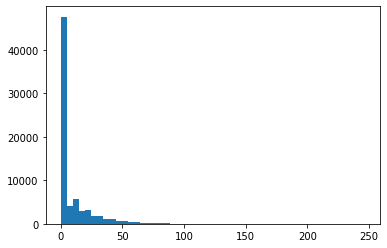

In [22]:
plt.hist(grades['sum_violations'], bins = 50);

In [23]:
grades['score'].describe()

count    72243.000000
mean        91.357654
std         15.921356
min       -147.000000
25%         88.000000
50%        100.000000
75%        100.000000
max        100.000000
Name: score, dtype: float64

In [24]:
#distribution of grades?

In [25]:
grades['grade'].value_counts()

A    49937
C    11827
B    10479
Name: grade, dtype: int64

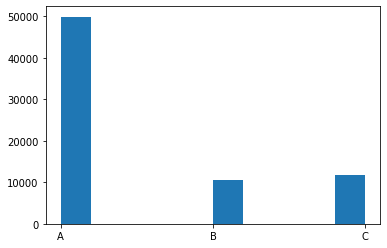

In [26]:
plt.hist(grades['grade']);

# how are restaurants failing inspections yet getting "A" grades?

In [27]:
grades[(grades['grade'] == "A")&(grades['result'] == "HE_Fail")]

,licenseno,issdttm,expdttm,licstatus,licensecat,descript,result,resultdttm,sum_violations,score,grade
2,18086,12/27/2011 12:46,12/31/2011 23:59,Inactive,RF,Retail Food,HE_Fail,1/3/2012 10:06,6,94,A
23,21177,12/7/2011 9:45,12/31/2018 23:59,Active,RF,Retail Food,HE_Fail,1/3/2012 11:59,2,98,A
27,31976,1/3/2012 8:11,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Fail,1/3/2012 12:31,4,96,A
37,77953,1/10/2012 9:32,12/31/2012 23:59,Inactive,FS,Eating & Drinking,HE_Fail,1/3/2012 14:06,4,96,A
76,23720,12/9/2011 9:34,12/31/2014 23:59,Inactive,FS,Eating & Drinking,HE_Fail,1/4/2012 14:11,4,96,A
...,...,...,...,...,...,...,...,...,...,...,...
71931,26455,3/5/2012 10:40,12/31/2018 23:59,Active,FT,Eating & Drinking w/ Take Out,HE_Fail,6/19/2018 14:01,4,96,A
72088,160787,6/29/2016 8:54,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Fail,6/25/2018 14:34,4,96,A
72101,365167,6/28/2018 9:31,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Fail,6/26/2018 10:38,4,96,A
72124,24015,1/11/2012 8:25,12/31/2018 23:59,Active,RF,Retail Food,HE_Fail,6/26/2018 15:06,6,94,A


In [28]:
#turns out you need a perfect score to pass -- why grades when you need a perfect score to pass?

In [29]:
grades[(grades['result'] == "HE_Pass")&(grades['sum_violations']!=0)]

,licenseno,issdttm,expdttm,licstatus,licensecat,descript,result,resultdttm,sum_violations,score,grade
2956,23923,1/9/2012 14:38,12/31/2018 23:59,Active,FS,Eating & Drinking,HE_Pass,4/11/2012 14:44,2,98,A
59081,137353,11/21/2014 15:05,12/31/2018 23:59,Active,FT,Eating & Drinking w/ Take Out,HE_Pass,4/10/2017 13:51,12,88,B


In [30]:
#mistake?

In [31]:
#trends over time?
#make columns into datetime objects

In [32]:
def make_datetime(x):
    if x == " ":
        return np.NaN
    return datetime.strptime(x, "%m/%d/%Y %H:%M")

In [33]:
grades[grades["issdttm"]== " "] 

,licenseno,issdttm,expdttm,licstatus,licensecat,descript,result,resultdttm,sum_violations,score,grade
15237,86678,,,Inactive,RF,Retail Food,HE_Fail,1/16/2013 13:10,9,91,B
15683,86678,,,Inactive,RF,Retail Food,HE_Pass,1/31/2013 13:48,0,100,A
17617,90297,,,Inactive,FS,Eating & Drinking,HE_Fail,4/10/2013 11:26,16,84,B
17760,90297,,,Inactive,FS,Eating & Drinking,HE_Hearing,4/17/2013 10:43,16,84,B
18272,90297,,,Inactive,FS,Eating & Drinking,HE_Pass,5/8/2013 13:40,0,100,A
23100,79021,,,Inactive,FT,Eating & Drinking w/ Take Out,HE_TSOP,11/22/2013 10:37,14,86,B
37341,141356,,,Inactive,RF,Retail Food,HE_Fail,3/20/2015 12:31,8,92,B
37545,141356,,,Inactive,RF,Retail Food,HE_OutBus,3/27/2015 13:29,8,92,B
44888,158413,,,Inactive,RF,Retail Food,HE_Pass,12/9/2015 11:51,0,100,A
44889,158254,,,Inactive,RF,Retail Food,HE_Pass,12/9/2015 12:00,0,100,A


In [34]:
grades["issdttm"] = grades["issdttm"].apply(make_datetime)

In [35]:
grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72243 entries, 0 to 72242
Data columns (total 11 columns):
licenseno         72243 non-null int64
issdttm           72213 non-null datetime64[ns]
expdttm           72243 non-null object
licstatus         72243 non-null object
licensecat        72243 non-null object
descript          72243 non-null object
result            72243 non-null object
resultdttm        72243 non-null object
sum_violations    72243 non-null int64
score             72243 non-null int64
grade             72243 non-null object
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 6.1+ MB


In [36]:
grades["expdttm"] = grades["expdttm"].apply(make_datetime)

In [37]:
grades["resultdttm"] = grades["resultdttm"].apply(make_datetime)

In [38]:
#make categorical variables into dummies or logitudinal? -- could change grades and result?

## Do poorly performing restaurants have a different type distribution?

In [39]:
c = grades[grades['grade']== "C"]

In [40]:
over_100 = grades[grades["sum_violations"] > 100]

In [41]:
grades["descript"].value_counts(normalize = True)

Eating & Drinking                0.426062
Eating & Drinking w/ Take Out    0.373337
Retail Food                      0.181208
Mobile Food Walk On              0.019393
Name: descript, dtype: float64

In [42]:
c["descript"].value_counts(normalize = True)

Eating & Drinking                0.491333
Eating & Drinking w/ Take Out    0.389702
Retail Food                      0.102308
Mobile Food Walk On              0.016657
Name: descript, dtype: float64

In [43]:
over_100["descript"].value_counts(normalize = True)

Eating & Drinking                0.595238
Eating & Drinking w/ Take Out    0.371429
Retail Food                      0.033333
Name: descript, dtype: float64

More just "eating and drinking" in the poor performers than the overall dataset -- city should concentrate more resources on these establishments? Do statistical test to see if it's significant before making recommendations.

## Are poorly performing restaurants inspected more regularly?

In [44]:
#how often do poorly performing restaurants get inspected?

In [45]:
#average number of times each grade of restaurant is inspected

In [46]:
print(grades['licenseno'][grades['grade'] == "C"].value_counts().mean())
print(grades['licenseno'][grades['grade'] == "C"].value_counts().median())

3.379142857142857
2.0


In [47]:
print(grades['licenseno'][grades['grade'] == "B"].value_counts().mean())
print(grades['licenseno'][grades['grade'] == "B"].value_counts().median())

2.659644670050761
2.0


In [48]:
print(grades['licenseno'][grades['grade'] == "A"].value_counts().mean())
print(grades['licenseno'][grades['grade'] == "A"].value_counts().median())

6.615048350774937
6.0


In [49]:
# Restaurants with "A" grades are inspected much more, but is that just because they stay in business longer?

In [50]:
#look at average inspections in a year?

In [51]:
grades_2017 = grades[grades["issdttm"].apply(lambda x:x.year == 2017)]

In [52]:
grades_2017.head()

,licenseno,issdttm,expdttm,licstatus,licensecat,descript,result,resultdttm,sum_violations,score,grade
54609,303293,2017-01-12 09:31:00,2018-12-31 23:59:00,Active,FS,Eating & Drinking,HE_Fail,2016-10-25 15:36:00,28,72,C
54929,303301,2017-02-07 08:03:00,2018-12-31 23:59:00,Active,RF,Retail Food,HE_Pass,2016-11-04 13:58:00,0,100,A
54992,303293,2017-01-12 09:31:00,2018-12-31 23:59:00,Active,FS,Eating & Drinking,HE_Pass,2016-11-08 10:06:00,0,100,A
55236,166851,2017-02-07 08:00:00,2018-12-31 23:59:00,Active,FS,Eating & Drinking,HE_Pass,2016-11-16 11:08:00,0,100,A
55350,140119,2017-01-31 12:31:00,2018-12-31 23:59:00,Active,FT,Eating & Drinking w/ Take Out,HE_Pass,2016-11-17 15:46:00,0,100,A


In [53]:
print("A")
print(grades_2017['licenseno'][grades['grade'] == "C"].value_counts().mean())
print(grades_2017['licenseno'][grades['grade'] == "C"].value_counts().median())

print("B")
print(grades_2017['licenseno'][grades['grade'] == "B"].value_counts().mean())
print(grades_2017['licenseno'][grades['grade'] == "B"].value_counts().median())

print("C")
print(grades_2017['licenseno'][grades['grade'] == "A"].value_counts().mean())
print(grades_2017['licenseno'][grades['grade'] == "A"].value_counts().median())

A
1.3703703703703705
1.0
B
1.2428571428571429
1.0
C
2.4601542416452444
2.0


In [54]:
#let's check all years

In [70]:
years = list(range(2012, 2019))
bar_c = []
bar_b = []
bar_a = []

for y in years:
    df = grades[grades["resultdttm"].apply(lambda x:x.year == y)]
    
    print(y)
    
    print("C")
    bar_c.append(df['licenseno'][df['grade'] == "C"].value_counts().mean())
    
    print(df['licenseno'][df['grade'] == "C"].value_counts().mean())

    print("B")
    
    bar_b.append(df['licenseno'][df['grade'] == "B"].value_counts().mean())
    
    print(df['licenseno'][df['grade'] == "B"].value_counts().mean())

    print("A")
    
    bar_a.append(df['licenseno'][df['grade'] == "A"].value_counts().mean())
    
    print(df['licenseno'][df['grade'] == "A"].value_counts().mean())
    
    print()

2012
C
1.4185328185328185
B
1.2717219589257505
A
2.0963676797627873

2013
C
1.3709251101321587
B
1.2076788830715532
A
2.0875338087042046

2014
C
1.3654743390357698
B
1.2212244897959184
A
1.5490861618798955

2015
C
1.408878504672897
B
1.258955223880597
A
1.6886475303853117

2016
C
1.429945054945055
B
1.2911306702775898
A
1.7502472799208704

2017
C
1.3286885245901638
B
1.2199036918138042
A
1.7399802078179119

2018
C
1.107312440645774
B
1.0644768856447688
A
1.2104010876954452



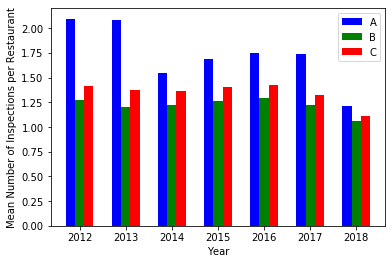

In [79]:
x = np.array(years)

y = bar_a
z = bar_b
k = bar_c

ax = plt.subplot(111)
ax.bar(x-0.2, y, width=0.2, color='b', align='center', label = "A")
ax.bar(x, z, width=0.2, color='g', align='center', label = "B")
ax.bar(x+0.2, k, width=0.2, color='r', align='center', label = "C")

plt.xlabel("Year")

plt.ylabel("Mean Number of Inspections per Restaurant")

plt.legend();


In [56]:
#Each year, the best rated restaurants are being inspected more -- inspections are ineffective. However, the number of insepction is going down every year for all grades of restaurants. The poorer rated restaurants are being inspected slightly less more regularly as the years pass. 

In [57]:
#make triple bar graph for each year to show the means

In [58]:
#show that the number of inspections is going down each year 
inspections_per_year = []
for y in years:
    df = grades[grades["resultdttm"].apply(lambda x:x.year == y)]
    
    inspections_per_year.append(len(df))

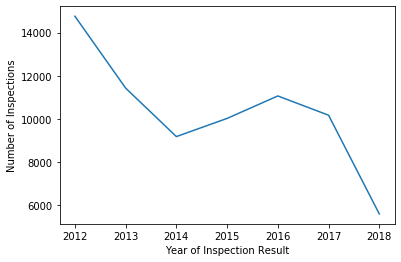

In [68]:
inspections_per_year
plt.plot(years, inspections_per_year)
plt.xlabel("Year of Inspection Result")
plt.ylabel("Number of Inspections")
plt.show()

In [60]:
#I suspect there is simply missing data in 2018 but still shows a decrease from year to year

In [62]:
#has the number of poorly performing restaurants decreased year to year?

In [81]:
years = list(range(2012, 2019))
bar_a = []
bar_b = []
bar_c = []

for y in years:
    df = grades[grades["resultdttm"].apply(lambda x:x.year == y)]
    
    print(y)
    
    print(df['grade'].value_counts(normalize = True).A)
    
    
    bar_a.append(df['grade'].value_counts(normalize = True).A)
    
    bar_b.append(df['grade'].value_counts(normalize = True).B)
    
    bar_c.append(df['grade'].value_counts(normalize = True).C)
    
    print()

2012
0.7664475913002236

2013
0.7427821522309711

2014
0.6459444746869897

2015
0.6513066028326352

2016
0.6395590494262221

2017
0.6912718694712011

2018
0.6356658336308462



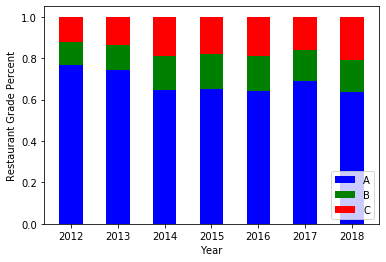

In [93]:
x = np.array(years)

y = np.array(bar_a)
z = np.array(bar_b)
k = np.array(bar_c)

ax = plt.subplot(111)
ax.bar(x, y, width=0.5, color='b', align='center', label = "A")
ax.bar(x, z, width=0.5, color='g', align='center', label = "B", bottom = y)
ax.bar(x, k, width=0.5, color='r', align='center', label = "C", bottom = z + y)

plt.xlabel("Year")

plt.ylabel("Restaurant Grade Percent")

plt.legend(loc = "lower right");


In [ ]:
#the proportion of "A" graded restaurants has been slipping

The city does seem to be inspecting effectively as it is using more resources on more poorly performing restaurants, however the general downward trend in spections is concerning. 

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(array([736695., 736726., 736754., 736785., 736815., 736846., 736876.]),
 <a list of 7 Text xticklabel objects>)

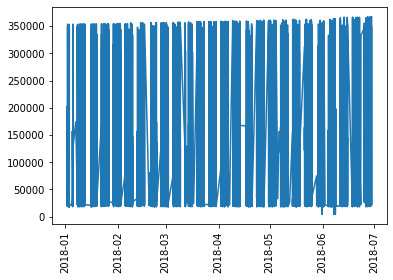

In [67]:
time = grades.sort_values('resultdttm', ascending=True)
plt.plot(df['resultdttm'], df['licenseno'])
plt.xticks(rotation='vertical')